In [1]:
!pip install gymnasium
!pip install 'pettingzoo[mpe]'
import numpy as np
import torch
import torch.nn as nn
import numpy as np
import tensorflow as tf
import gym
import gymnasium as gym
from gymnasium.utils.save_video import save_video
import numpy as np
import time


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


In [29]:
enum_action = { 0: "DO_nothing", 0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP" }



# hyperparameters
REPS = 20
EPISODES = 3000
EPSILON = 0.8
LEARNING_RATE = 0.1
DISCOUNT = 0.9
scale = 20


In [30]:
from pettingzoo.mpe import simple_adversary_v3,simple_v3

env = simple_v3.env(max_cycles=25, continuous_actions=False,render_mode="human")
env.reset(seed=42)



In [31]:
for agent in env.agents:
    print(agent, env.observation_space(agent).shape[0])
    observ_space_num =env.observation_space(agent).shape[0]


agent_0 4


In [32]:
for agent in env.agents:
    print(agent, env.action_space(agent).n)
    action_space_num =env.action_space(agent).n


agent_0 5


In [33]:
for agent in env.agents:
    num_states =env.observation_space(agent).shape[0]
    print(agent, env.observation_space(agent))
print("Observatons", env.observation_space)
for agent in env.agents:
    num_actions =env.action_space(agent).n
    print(agent, env.action_space(agent))
# Initialize Q-table
print("Initialize Q-table...")

print("Number of states", num_states)
print("Number of actions", num_actions)
q_table = np.zeros((num_states, num_actions))
print("Q-table", q_table.shape)
# qlearn =QLearn(num_states, num_actions, EPSILON, DISCOUNT, LEARNING_RATE ,scale)

agent_0 Box(-inf, inf, (4,), float32)
Observatons <bound method BaseWrapper.observation_space of <pettingzoo.utils.wrappers.order_enforcing.OrderEnforcingWrapper object at 0x785bebf7da20>>
agent_0 Discrete(5)
Initialize Q-table...
Number of states 4
Number of actions 5
Q-table (4, 5)


In [34]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [35]:
# Function for get single state
def get_single_state(state):
    new_state = []
    for position in range(len(state)):
        new_value = (state[position] + 2)
        if new_value < 0 :
          new_value = 0
        if new_value > 4 :
          new_value = 4
        new_state.append(int(round(new_value, 0)))
    single_state = int(new_state[2]/0.2   - 1 )*20 + int(new_state[3]/0.2) -1
    return single_state

In [36]:
# Define the actor and critic networks
actor = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),  # Assuming state.shape[0] is the dimension of your state
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

critic = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),  # Assuming state.shape[0] is the dimension of your state
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Define optimizer and loss functions
actor_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
critic_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)



In [37]:
# Main training loop
num_episodes = 1000
gamma = 0.99
episode_reward = 0
reward_list = []
for episode in range(num_episodes):
    termination = False
    truncation = False
    episode_reward = 0
    env.reset(seed=42)
    state, reward, _, _, _ = env.last()


    with tf.GradientTape(persistent=True) as tape:
        while not termination and not truncation:

            # Choose an action using the actor
            action_probs = actor(np.array([state]))
            action = np.random.choice(5, p=action_probs.numpy()[0])

            # Take the chosen action and observe the next state and reward
            env.step(action)
            next_state, reward, termination, truncation, info = env.last()

            # Compute the advantage
            state_value = critic(np.array([state]))[0, 0]
            next_state_value = critic(np.array([next_state]))[0, 0]
            advantage = reward + gamma * next_state_value - state_value

            # Compute actor and critic losses
            actor_loss = -tf.math.log(action_probs[0, action]) * advantage
            critic_loss = tf.square(advantage)
            episode_reward += reward

            # Update actor and critic
            actor_gradients = tape.gradient(actor_loss, actor.trainable_variables)
            critic_gradients = tape.gradient(critic_loss, critic.trainable_variables)
            actor_optimizer.apply_gradients(zip(actor_gradients, actor.trainable_variables))
            critic_optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))

        reward_list.append(episode_reward)
        print(f"Episode {episode}, Reward: {episode_reward}")


Episode 0, Reward: -18.314079028696323
Episode 1, Reward: -10.355836231999945
Episode 2, Reward: -20.42801013530161
Episode 3, Reward: -15.26280407202759
Episode 4, Reward: -4.393264311673946
Episode 5, Reward: -10.804349816355778
Episode 6, Reward: -10.66617256942168
Episode 7, Reward: -8.048887316541673
Episode 8, Reward: -5.847479836752648
Episode 9, Reward: -4.671241262060469
Episode 10, Reward: -6.537338715962501
Episode 11, Reward: -16.833037297393087
Episode 12, Reward: -3.8995897399699078
Episode 13, Reward: -12.507889480574052
Episode 14, Reward: -15.210261914179
Episode 15, Reward: -6.756548235599112
Episode 16, Reward: -4.070986319553541
Episode 17, Reward: -5.5434750622904465
Episode 18, Reward: -14.556957609758784
Episode 19, Reward: -15.134480861620123
Episode 20, Reward: -15.471086692417789
Episode 21, Reward: -8.07322282118757
Episode 22, Reward: -11.037888941866996
Episode 23, Reward: -38.58556680684034
Episode 24, Reward: -40.060481480734815
Episode 25, Reward: -20.40

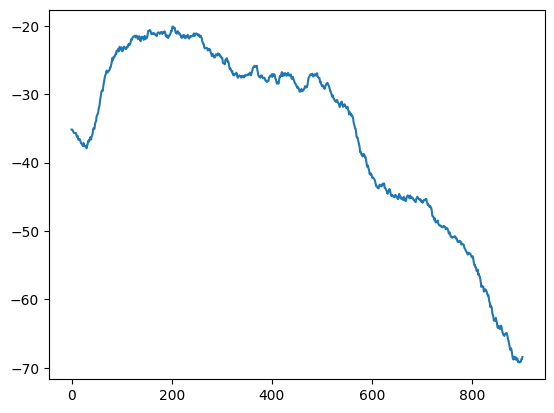

In [5]:
import matplotlib.pyplot as plt

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


plt.plot(moving_average(reward_list, n=100))


In [39]:
# Open a file in write mode
with open('list_data.txt', 'w') as file:
    # Convert the list to a string and write it to the file
    file.write(' '.join(map(str, reward_list)))